In [1]:
import pandas as pd

#### Load the data from http://insideairbnb.com/los-angeles
#### This website already shares a lot of useful analysis on the data such as
- 45,485 AirBnB listings in the data set
- 71.6% of listings are for entire homes/apartments and 26.2% of listings are for private rooms
- 53% of the listings are Short Term Rentals and require bookings to be at least a month long

#### This project will focus only on Short Term Rental listings in order to standardize the data
         
        
        

In [3]:
data = pd.read_csv('listings.csv')

In [4]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,183319,https://www.airbnb.com/rooms/183319,20220909140055,2022-09-10,previous scrape,Panoramic Ocean View Venice Beach,Craftsmen style penthouse with ocean view from...,About as close to the beach as you can live in...,https://a0.muscache.com/pictures/1170205/e2596...,867995,...,5.00,5.00,5.00,NaN,f,2,2,0,0,0.02
1,51307,https://www.airbnb.com/rooms/51307,20220909140055,2022-09-10,city scrape,Spanish Bungalow Guest House LA CA. 30 plus ni...,PRIVATE GUEST HOUSE<br /><br /><b>The space</b...,"Local LA Community , shops and restaurants in...",https://a0.muscache.com/pictures/294658/ac8d6e...,235568,...,4.85,4.95,4.76,NaN,f,2,2,0,0,0.98
2,184314,https://www.airbnb.com/rooms/184314,20220909140055,2022-09-10,previous scrape,Boho Chic Flat..Steps to Beach!,"Bright, airy, quiet 1 bdr located just steps f...",You are in one of the beach locations in Los A...,https://a0.muscache.com/pictures/0bc2f8b7-9378...,884031,...,4.93,4.89,4.85,NaN,t,1,1,0,0,0.22
3,51498,https://www.airbnb.com/rooms/51498,20220909140055,2022-09-10,city scrape,Guest House With Its Own Entrance/Exit and Hot...,"Fully self-contained, separate structure, with...",We are close to Venice without the hassle of n...,https://a0.muscache.com/pictures/83426633/c9e3...,236758,...,4.90,4.83,4.74,HSR19-001336,f,1,1,0,0,2.60
4,109,https://www.airbnb.com/rooms/109,20220909140055,2022-09-10,city scrape,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.01


In [5]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
len(data)

45815

#### Histogram of the last review date for each AirBnb

array([[<AxesSubplot:title={'center':'last_review'}>]], dtype=object)

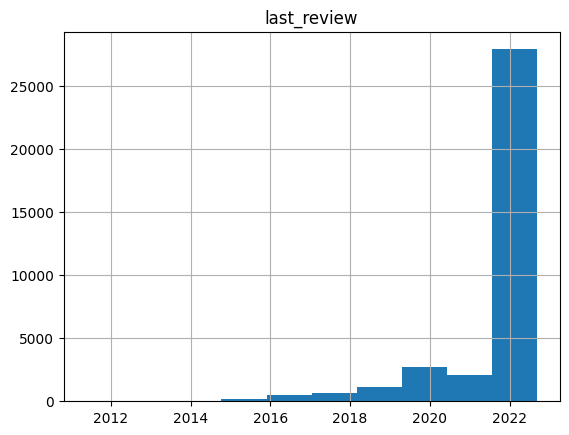

In [21]:
data.hist(column = 'last_review')

#### Filter the data to only AirBnBs that qualify as Short Term Rentals (minimum nights stay is longer than a month) and to AirBnBs that have been reviewed in 2022

In [41]:
filter_data = data[data['last_review'] > '2022-01-01']

In [45]:
filter_data = filter_data[filter_data['minimum_nights'] >= 28]

In [49]:
len(filter_data)

8066

array([[<AxesSubplot:title={'center':'bedrooms'}>]], dtype=object)

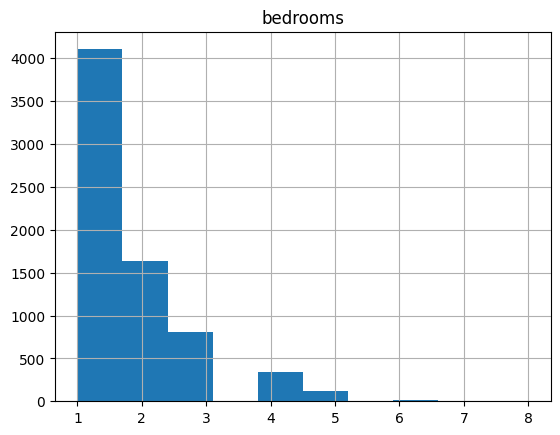

In [51]:
filter_data.hist(column = 'bedrooms')

In [54]:
filter_data['bedrooms'].value_counts()

1.0    4104
2.0    1633
3.0     804
4.0     341
5.0     118
6.0      18
7.0       9
8.0       4
Name: bedrooms, dtype: int64

In [55]:
sum(filter_data['bedrooms'].value_counts())

7031

In [59]:
filter_data[filter_data['room_type'] == 'Entire home/apt']

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,51546,https://www.airbnb.com/rooms/51546,20220909140055,2022-09-10,city scrape,Cool Pad Under the Hollywood Sign,"*** Please note, after January 2, 2020 we can ...","Beachwood Canyon is peaceful, natural, and lov...",https://a0.muscache.com/pictures/3871329/c992d...,237114,...,4.99,4.96,4.89,NaN,f,1,1,0,0,1.30
15,191733,https://www.airbnb.com/rooms/191733,20220909140055,2022-09-10,city scrape,Gorgeous Spanish/Modern Guesthouse,"Our modern, meticulously-appointed guesthouse ...",We love Atwater because it is so pedestrian-fr...,https://a0.muscache.com/pictures/35300224/4b2e...,1597048,...,4.99,4.82,4.86,NaN,f,1,1,0,0,0.64
26,196410,https://www.airbnb.com/rooms/196410,20220909140055,2022-09-10,city scrape,Little villa Apartment,"Adorable apt in heart of Echo Park, peaceful, ...",NaN,https://a0.muscache.com/pictures/2435206/4ddf2...,78804,...,4.88,4.72,4.47,NaN,f,3,3,0,0,0.45
27,7992,https://www.airbnb.com/rooms/7992,20220909140055,2022-09-10,city scrape,Quiet/Cozy/Clean/Walkable Quaint Area,"Hello, Traveler. Please note that this is not...",Atwater Village has a variety of great shops a...,https://a0.muscache.com/pictures/miso/Hosting-...,22363,...,4.97,4.94,4.89,HSR19-003514,f,2,2,0,0,2.04
28,197756,https://www.airbnb.com/rooms/197756,20220909140055,2022-09-10,city scrape,Hillside Apartment in Silverlake (Sunset Junct...,Private garden ground floor flat tucked away b...,"I love the neighborhoods walk ability, unique ...",https://a0.muscache.com/pictures/06cf1412-b66b...,964494,...,4.91,4.91,4.62,NaN,f,1,1,0,0,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45721,649963262424894500,https://www.airbnb.com/rooms/649963262424894500,20220909140055,2022-09-10,previous scrape,100 steps to the sand,A peek of an ocean view and across the street ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,11067919,...,5.00,5.00,5.00,SLP13193,t,1,1,0,0,0.45
45743,660512367793219450,https://www.airbnb.com/rooms/660512367793219450,20220909140055,2022-09-10,previous scrape,The Beachcomber Home - By the Ocean Collection...,At SoCal Investment and Realty we offer a vari...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,156729925,...,4.67,4.50,4.50,Exempt,t,34,34,0,0,3.00
45746,587812597088161307,https://www.airbnb.com/rooms/587812597088161307,20220909140055,2022-09-10,previous scrape,Casa de Rottie - Irvine's peaceful urban oasis,Welcome to this newly remodeled urban oasis in...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,50158258,...,5.00,5.00,4.50,NaN,t,1,1,0,0,1.11
45759,4449287,https://www.airbnb.com/rooms/4449287,20220909140055,2022-09-10,previous scrape,Irvine Family & Friend 3 bed&2.5 bath Gated Villa,Welcome to the gated Luxury Resort Villa in Ir...,Resort style amenities in the community includ...,https://a0.muscache.com/pictures/71322409/bb7a...,20743830,...,5.00,4.92,4.92,NaN,f,5,5,0,0,0.52


In [62]:
filter_data[filter_data['room_type'] == 'Entire home/apt']['bedrooms'].value_counts()

1.0    2552
2.0    1603
3.0     798
4.0     335
5.0     118
6.0      18
7.0       9
8.0       4
Name: bedrooms, dtype: int64